In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers, optimizers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Lambda


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Mar  4 14:44:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, optimizers, callbacks, applications
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
batch_size = 64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('drive/MyDrive/')

In [ ]:
!ls

 1628602417763.jpg
'Colab Notebooks'
'Getting started.pdf'
 IMG-bb1327fa43191fc40b07178ad760d4f1-V.jpg
 IMG-fa61f60c88278450511c3dd78d159f3f.jpg
'Ivan Anđelković de.gdoc'
'Ivan Anđelković de.pdf'
 Offer_Document_Ivan_Andelkovic.gdoc
 Offer_Document_Ivan_Andelkovic.pdf
'Project Data Science LW'
'RainmakerSociety_Group Financial Controller_Fitness industry.pdf'
'raw data'
 raw_data
 r_data
'Teme za ucenje Data Science.gsheet'


In [ ]:
# Let's store the location of our data in 2 variables that we can re use later

train_data_dir = 'r_data/Training'
test_data_dir = 'r_data/Testing'

In [ ]:
train_ds, val_ds = image_dataset_from_directory(
  train_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(255, 255),
  validation_split = 0.2,
  subset="both",
  color_mode = 'rgb',
  batch_size= batch_size)

# We define a second one for the test data

test_ds = image_dataset_from_directory(
  test_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(255, 255),
  color_mode = 'rgb',
  batch_size= batch_size)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [ ]:
model_main = applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
def initialize_model():
    
    model_v3 = Sequential([
       Lambda(preprocess_input),
        model_main,
        Flatten(),
        Dense(4, activation = 'softmax')
        ])

    return model_v3

In [ ]:
model_v3 = initialize_model()

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.1)

model_v3.compile(loss = 'categorical_crossentropy',
                  optimizer = "adam",
                  metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 5, verbose = 2)
history = model_v3.fit(train_ds,
                       validation_data=val_ds,
                      #  callbacks = [es], 
                       epochs = 40 , 
                       batch_size = 64)

Epoch 1/40
72/72 [==============================] - 796s 9s/step - loss: 0.9375 - accuracy: 0.8142 - val_loss: 11933.1152 - val_accuracy: 0.2811
Epoch 2/40
72/72 [==============================] - 49s 661ms/step - loss: 0.3427 - accuracy: 0.9070 - val_loss: 143328.9531 - val_accuracy: 0.2811
Epoch 3/40
72/72 [==============================] - 50s 680ms/step - loss: 0.1487 - accuracy: 0.9479 - val_loss: 7.3678 - val_accuracy: 0.7820
Epoch 4/40
72/72 [==============================] - 48s 654ms/step - loss: 0.8874 - accuracy: 0.8497 - val_loss: 123306.4375 - val_accuracy: 0.2014
Epoch 5/40
72/72 [==============================] - 48s 656ms/step - loss: 0.9602 - accuracy: 0.7961 - val_loss: 1730187.0000 - val_accuracy: 0.2601
Epoch 6/40
72/72 [==============================] - 49s 669ms/step - loss: 0.5815 - accuracy: 0.8639 - val_loss: 3805.5254 - val_accuracy: 0.3958
Epoch 7/40
72/72 [==============================] - 48s 650ms/step - loss: 0.2510 - accuracy: 0.9105 - val_loss: 5.3712 -

In [ ]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

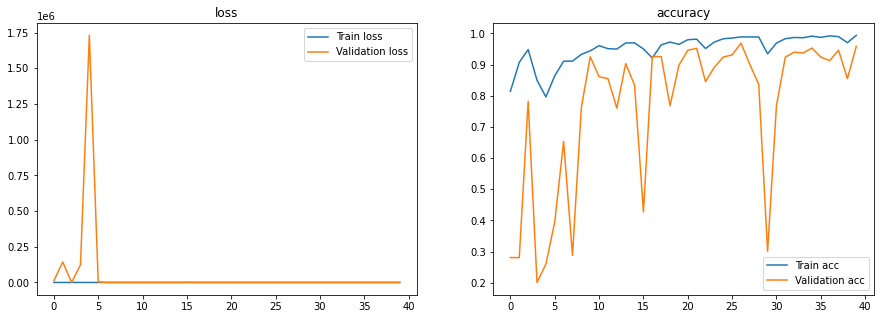

In [ ]:
plot_history(history)

In [ ]:
model_v3.evaluate(test_ds)

21/21 [==============================] - 167s 5s/step - loss: 0.1671 - accuracy: 0.9466


[0.16705766320228577, 0.9466056227684021]

In [ ]:
from tensorflow.keras.models import save_model
filepath = '/content/drive/MyDrive/Colab Notebooks/models'


save_model(
    model_v3,
    filepath,
    overwrite=True,
    include_optimizer=True,
    
    )


In [ ]:
model_v3.save('models/model_GoogleNet_Inception_v3.h5')

In [6]:
!ls models

ls: cannot access 'models': No such file or directory


In [ ]:
from tensorflow.keras.models import load_model
model_test = load_model('models/model_GoogleNet_Inception_v3.h5')
model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 255, 255, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 4)                 294916    
                                                                 
Total params: 22,097,700
Trainable params: 22,063,268
Non-trainable params: 34,432
_________________________________________________________________
